In [1]:
# import the module/class
from Cradar import Cradar


# exemplary files can be downloaded here:
# https://data.cresis.ku.edu/data/rds/2012_Greenland_P3/CSARP_standard/20120423_01/Data_20120423_01_044.mat
# https://data.cresis.ku.edu/data/rds/2012_Greenland_P3/CSARP_standard/20120423_01/Data_20120423_01_045.mat
# https://data.cresis.ku.edu/data/rds/2012_Greenland_P3/CSARP_standard/20120423_01/Data_20120423_01_046.mat

# The ice surface DEM GIMP here:
# https://storage.luckycloud.de/f/71252979168d420aa9c3/?dl=1

print('Libraries: \n \
      numpy, pandas, matplotlib \n \
      h5py, scipy, obspy, \n \
      geopandas, shapely, geopy, gdal (optional), \n \
      pyproj, pygmt \n \
      xarray, rioxarray, rasterio \n \
      ')




Libraries: 
       numpy, pandas, matplotlib 
       h5py, scipy, obspy, 
       geopandas, shapely, geopy, gdal (optional), 
       pyproj, pygmt 
       xarray, rioxarray, rasterio 
       


In [ ]:
help(Cradar)

### Example for a single profile


==> Loaded Data_20120423_01_046


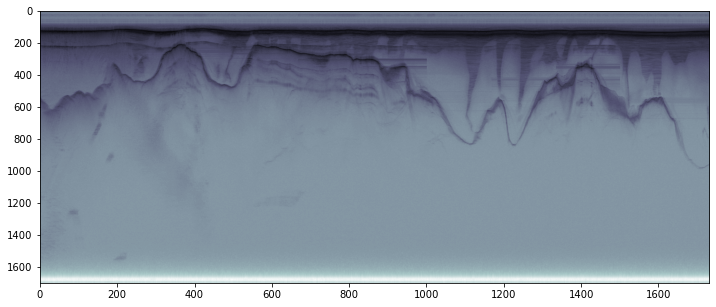

In [3]:
from Cradar import Cradar

matfile = '/home/sfranke/Downloads/Data_20120423_01_046.mat'

crd = Cradar().load_cresis_mat(matfile, dB=False)

if 1:
    import numpy as np
    import matplotlib.pyplot as plt

    plt.subplots(figsize=(12,5))
    plt.imshow(np.log10(crd.Data), aspect='auto', cmap='bone_r')

In [ ]:
crd.Frame

### Example for multiple profiles


==> Loaded Data_20120423_01_045

==> Loaded Data_20120423_01_046

==> Loaded Data_20120423_01_047
==> Concatenated ['Data_20120423_01_045', 'Data_20120423_01_046', 'Data_20120423_01_047']


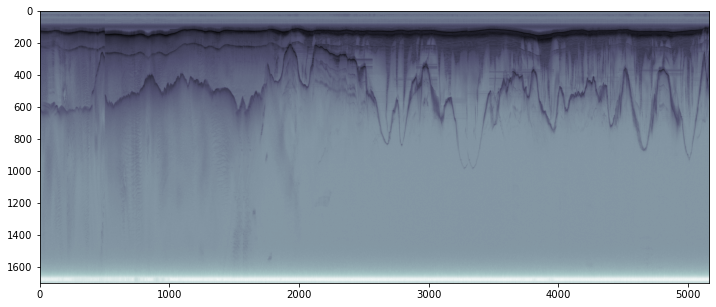

In [4]:
matfile_1 = '/home/sfranke/Downloads/Data_20120423_01_045.mat'
matfile_2 = '/home/sfranke/Downloads/Data_20120423_01_046.mat'
matfile_3 = '/home/sfranke/Downloads/Data_20120423_01_047.mat'

crd_1 = Cradar().load_cresis_mat(matfile_1, dB=False)
crd_2 = Cradar().load_cresis_mat(matfile_2, dB=False)
crd_3 = Cradar().load_cresis_mat(matfile_3, dB=False)

# concatenate profiles (creates a new object)
crd = Cradar.concat_frames([crd_1, crd_2, crd_3])


if 1:
    import numpy as np
    import matplotlib.pyplot as plt

    plt.subplots(figsize=(12,5))
    plt.imshow(np.log10(crd.Data), aspect='auto', cmap='bone_r')

### Example for multiple profiles if there are many and all of them in one folder

In [ ]:
import glob
import os

file_list   = []
crd_objects = []

#change to directory where matfiles are located
os.chdir('/home/sfranke/Downloads')

for matfile in sorted(glob.glob('Data*.mat')):
    crd = Cradar().load_cresis_mat(matfile, dB=False)
    crd_objects.append(crd)

crd = Cradar.concat_frames(crd_objects)

### Add ice surface information to Cradar object

In [5]:
# location of the DEM
GIMP = '/home/sfranke/Seafile/Orca/GeoData_ARC/GIMP_Surface_Greenland_EPSG3413.tif'

# geotif_name must be DEM_surface in this case
crd.grdtrack(geotif=GIMP, geotif_name='DEM_surface', geotif_epsg=3413)

==> Applying gridtrack method 1 ...
==> Added DEM_surface to the data


### Check if DEM_surface data is correct

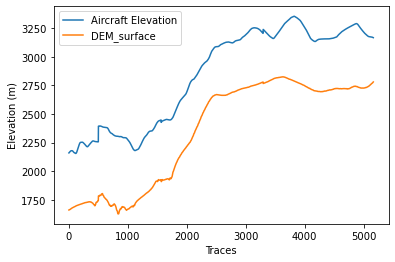

In [6]:
import matplotlib.pyplot as plt

plt.plot(crd.Elevation, label='Aircraft Elevation')   # aircraft elevation
plt.plot(crd.DEM_surface, label='DEM_surface') # ice surface from DEM
plt.ylabel('Elevation (m)')
plt.xlabel('Traces')
plt.legend()

### Convert from two way traveltime (twt) to real elevation

In [7]:
crdZ = Cradar.twt2elevation(crd, reference='DEM', setting='narrowband')

==> Now: twt2elevation...
... Using a ice surface DEM to derive elevation
... Processed  1  of  5167  Traces
... Processed  1001  of  5167  Traces
... Processed  2001  of  5167  Traces
... Processed  3001  of  5167  Traces
... Processed  4001  of  5167  Traces
... Processed  5001  of  5167  Traces
==> Done ...


### Plot radargram in twt and elevation

==> Added pixel index of surface reflection


Text(0.5, 1.0, 'elevation')

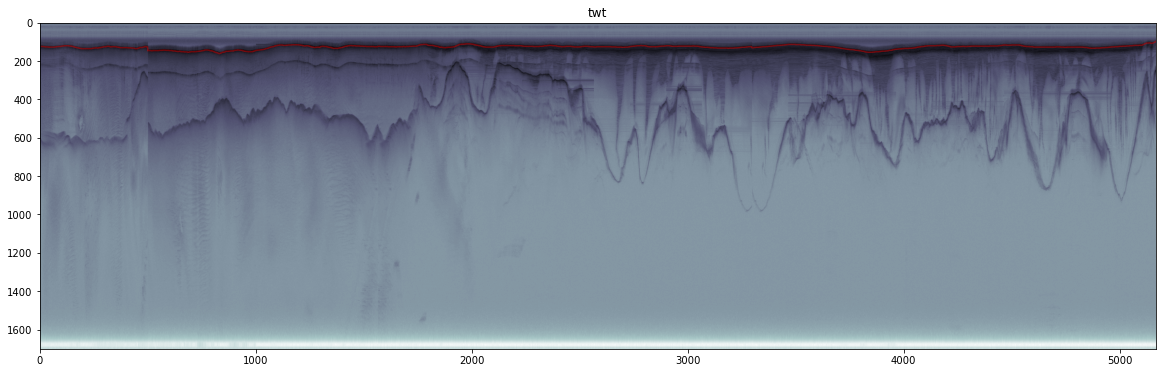

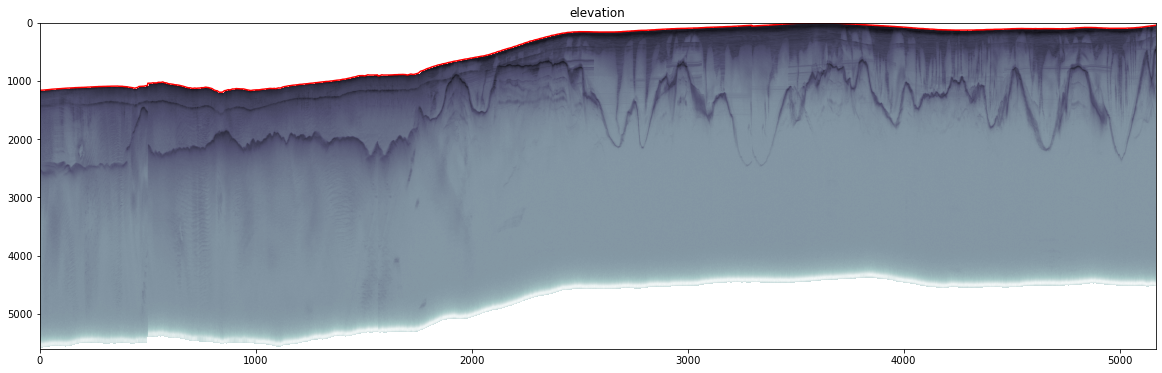

In [8]:
import numpy as np
import matplotlib.pyplot as plt

crd.get_surf_idx()

plt.subplots(figsize=(20,6))
plt.imshow(np.log10(crd.Data), aspect='auto', cmap='bone_r')
plt.plot(crd.Surface_idx, color='red', alpha=0.4)
plt.title('twt')

plt.subplots(figsize=(20,6))
plt.imshow(np.log10(crdZ.Data), aspect='auto', cmap='bone_r')
plt.plot(crdZ.Surface_m_idx, color='red')
plt.title('elevation')

### Convert and export to SEGY

In [9]:
crdZ.to_segy(region='Greenland', out_filename='', differenciate=False, step=1, save_segy=True, to_dB=True)

==> Processing Frame: Data_20120423_01_045_concat located in Greenland
... This file is in >> Z << domain
==> Written: Data_20120423_01_045_concat_Z.segy
